# Audio Filtering

**Procedure:**

* Read in audio

* Apply STFT (Window and FFT)

* Remove a range of frequencies we want out

* Apply Inverse STFT (to resynthesize)

* Write new audio

## Audio Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile

# Plot function for the graph
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size is not None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# stft function
def stft(input_data, sample_rate, window_size, hop_size):
    window = scipy.hamming(window_size)
    output = scipy.array([scipy.fft(window*input_data[i:i+window_size])
                         for i in range(0, len(input_data)-window_size, hop_size)])
    return output


def istft(input_data, sample_rate, window_size, hop_size, total_time):
    output = scipy.zeros(int(total_time*sample_rate))
    for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
        output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
    return output


def low_pass_filter(max_freq, window_size, sample_rate):
    fft_bin_width = sample_rate / window_size
    max_freq_bin = int(max_freq / fft_bin_width)
    filter_block = np.ones(window_size)
    filter_block[max_freq_bin:(window_size-max_freq_bin)] = 0
    return filter_block


def high_pass_filter(min_freq, window_size, sample_rate):
    return np.ones(window_size) - low_pass_filter(min_freq, window_size, sample_rate)


def write_audio_file(filename, filedata, sample_rate):
    scipy.io.wavfile.write(filename, sample_rate, filedata)


def filter_audio(input_signal, sample_rate, filter_window, window_size=256):
    # Setting parameters
    hop_size = window_size // 2
    total_time = len(input_signal) / sample_rate

    # Do actual filtering
    stft_output = stft(input_signal, sample_rate, window_size, hop_size)
    filtered_result = [original * filter_window for original in stft_output]
    resynth = istft(filtered_result, sample_rate, window_size, hop_size, total_time)

    return resynth

## A high-pass filter example

In [2]:
infile = "audio_files/ohm_scale.wav"
outfile = "audio_files/high_pass_out.wav"
window_size = 256

# Input
(sample_rate, input_signal) = scipy.io.wavfile.read(infile)

# Create filter window
filter_window = high_pass_filter(2500, window_size, sample_rate)

# Run filter
resynth = filter_audio(input_signal, sample_rate, filter_window, window_size)

# Output
write_audio_file(outfile, resynth, sample_rate)

## Spectrogram Before

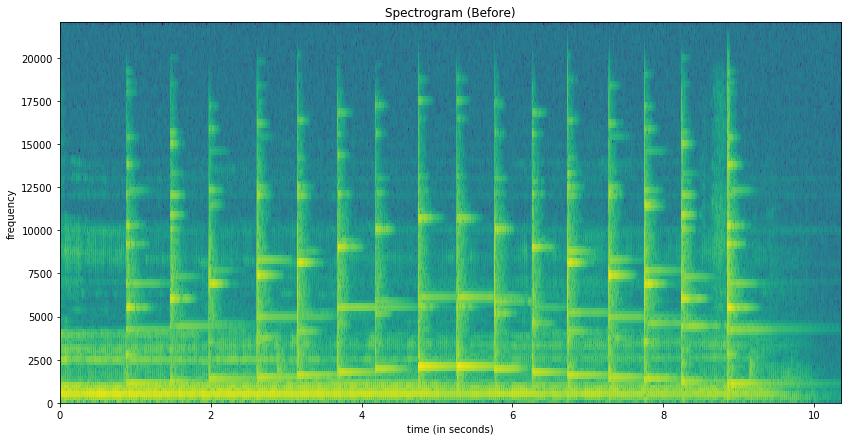

In [3]:
setup_graph(title='Spectrogram (Before)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal, Fs=sample_rate)
plt.show()

## Spectrogram After

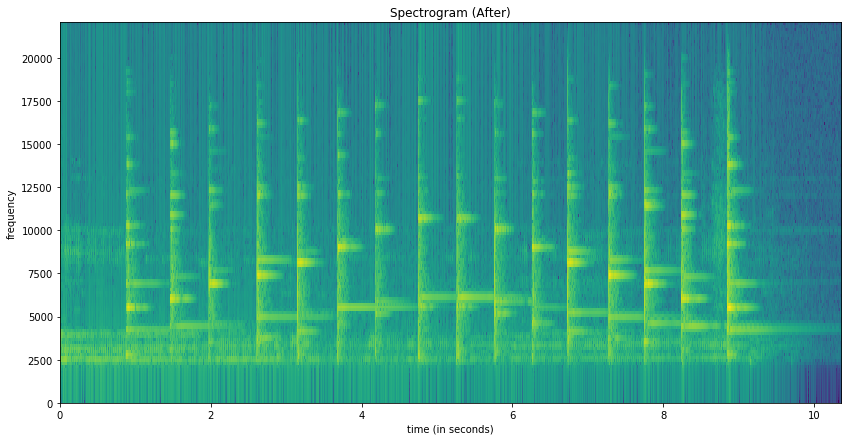

In [4]:
setup_graph(title='Spectrogram (After)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(resynth, Fs=sample_rate)
plt.show()

## Sound Wave Before

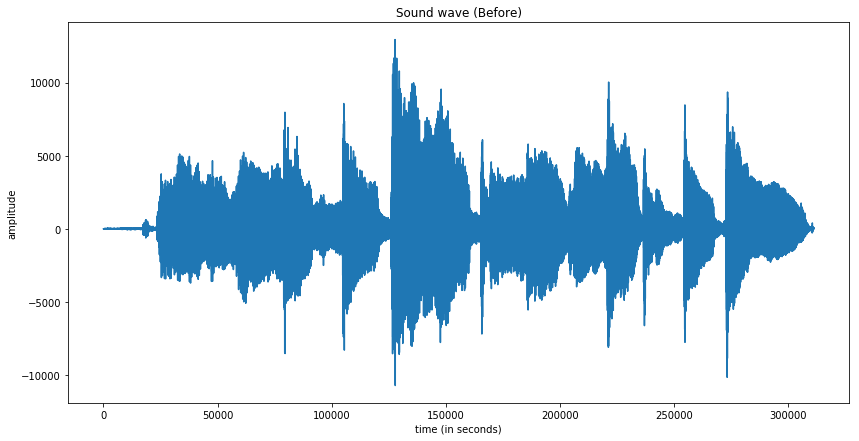

In [12]:
setup_graph(title='Sound wave (Before)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(input_signal)
plt.show()

## Sound Wave After

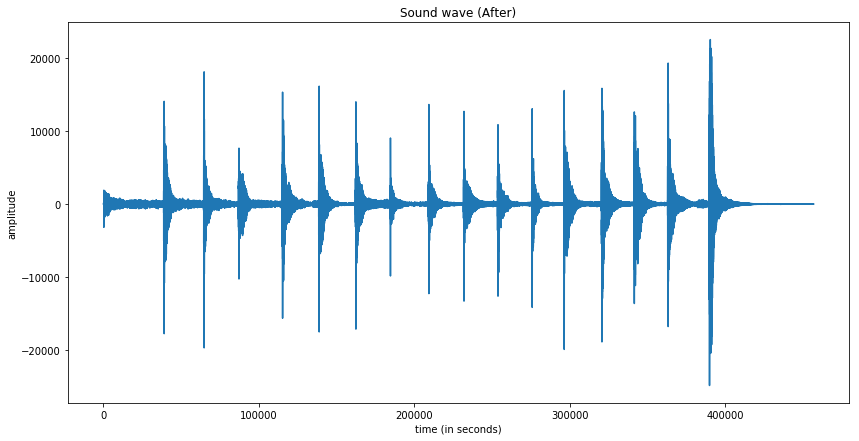

In [6]:
setup_graph(title='Sound wave (After)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(resynth)
plt.show()

## A low-pass filter example

In [7]:
infile = "audio_files/doremi_xylo.wav"
outfile = "audio_files/low_pass_out.wav"
window_size = 256

# Input
(sample_rate, input_signal) = scipy.io.wavfile.read(infile)

# Create filter window
filter_window = low_pass_filter(1700, window_size, sample_rate)

# Run filter
resynth = filter_audio(input_signal, sample_rate, filter_window, window_size)

# Output
write_audio_file(outfile, resynth, sample_rate)

## Spectrogram Before

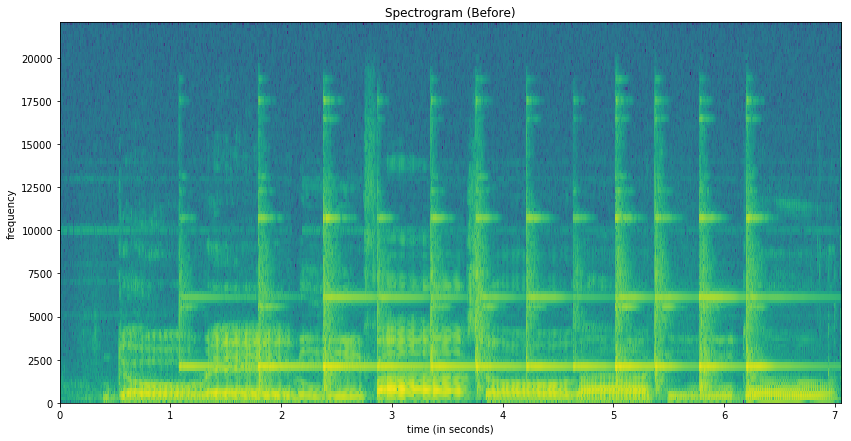

In [8]:
setup_graph(title='Spectrogram (Before)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal, Fs=sample_rate)
plt.show()

## Spectrogram After

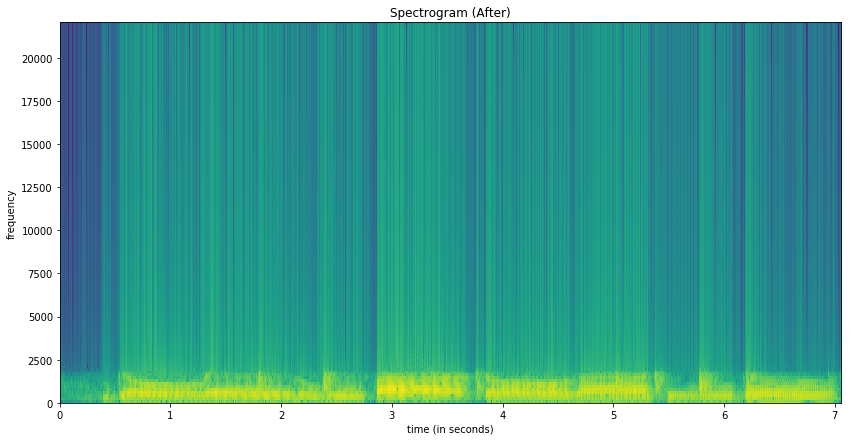

In [9]:
setup_graph(title='Spectrogram (After)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(resynth, Fs=sample_rate)
plt.show()

## Sound Wave Before

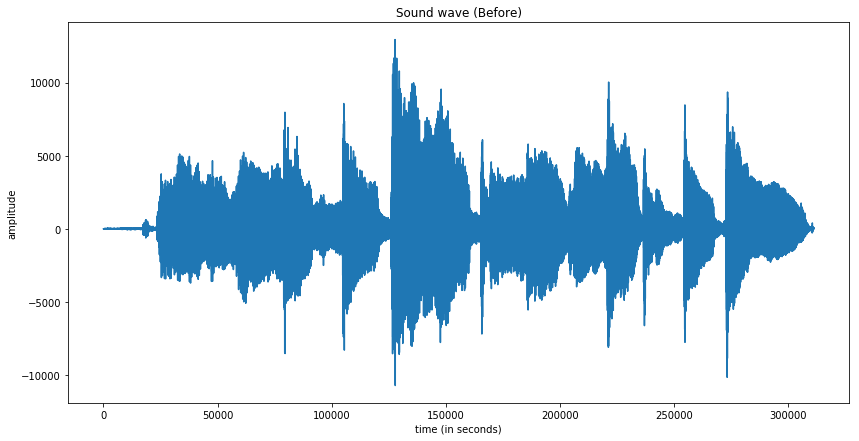

In [10]:
setup_graph(title='Sound wave (Before)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(input_signal)
plt.show()

## Sound Wave After

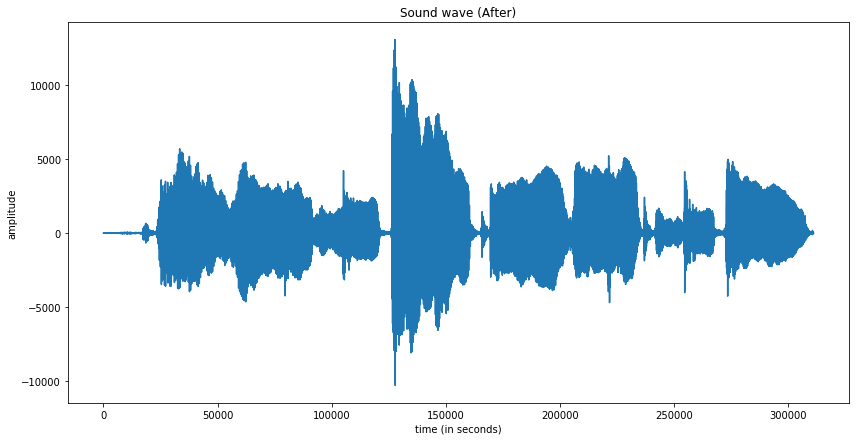

In [11]:
setup_graph(title='Sound wave (After)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(resynth)
plt.show()